# Text Analytics and NLP Workshop 

---
### *Sentiment Analysis of quotes from candidates vying to be the Democratic presidential nominee for the 2020 US presidential election.*
---



**Author**: Vishwa Pardeshi

**Why do we care about text data??**

The amount of text data generated has increased exponentially - quotes, messages, reviews. 

*What is text mining & NLP?*
* Transforms unstructured data into knowledge-rich structured data
* Allows integrating disparate sources for a complete view of product/market/population
* Uses Natural Language Processing (NLP) techniques to extract insights from text

Structuring and analyzing text data allows researchers, scientist, analysts to extract insights such as:

1. Similarity between two documents
2. Identify the writer of an article
3. Identify sentiment of a review or feedback on a product
4. Identify abstract topics within multiple document

**Problem Statement**

Given a dataset that contains quotes from debates between Democratic Presidential nominee for the 2020 presidential election, identify the sentiment of each of these quotes. 

**Overview of the notebook**

In this notebook, we will work through NLP techniques to learn how to extract insights from a text data source about democratic nominee quotes using NLP. This notebook is divided into the following parts:

1. Setup - Install libraries
2. Loading Data
3. Exploratory data analysis
4. Text Preprocessing
5. Sentiment Analysis - Library & Package

**Learning Outcome**

By the end of this workshop, you will be able to:

1. Use pandas to perform data analytics
2. Prepare text data for anlaysis
3. Perform sentiment analysis using packages
4. Use ML algorithms on text data




## Setup

In [ ]:
#installing libraries
!pip install vaderSentiment
!pip install unidecode

In [4]:
#Import libraries
#Data Manipualtion & Analysis
import pandas as pd #for dataframe

#Text Preprocessing
import nltk
from nltk.corpus import stopwords #for stopwords
from nltk.stem import WordNetLemmatizer #lemmatizing

from nltk import word_tokenize #tokenization
from nltk import pos_tag #finding part of speech tag. Is it verb? Noun?

from unidecode import unidecode #to help encode data in ASCII. Python's default encoding is ASCII

#Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #suitable for informal(twitter) text data

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

In [ ]:
nltk.download('wordnet')
nltk.download('punkt') #for stopwords
nltk.download('stopwords') #for stopwords
nltk.download('averaged_perceptron_tagger')

## Loading Data



Once you have a text data file (.csv, .xlsx, .json, .html, .pkl) that you want to analyze, you can load into a table-like dataframe structure. Loading data into a dataframe, allows you to 

1. Analyse and manipulate large amount of data 
2. Transform messy data into orderly form
3. Highly optimized performance for computation

Here, we load the csv containing the quotes into pandas dataframe `quotes_df`

https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [ ]:
#load .csv file into pandas dataframe 'quotes_df'
quotes_df = pd.read_csv('democratic_nominees_quotes.csv', header = None) #, header = None

#view top 5 rows of quotes_df
quotes_df.head()

## Exploratory Data Analysis & Cleaning



From the above view of the dataframe, we noticed the above issues:

1. The name of the column is not set
2. The quote is stored in the list and not string

This is all we get from the top 5 rows of the `quotes_df`. Let's dig deep into the dataset to identify any other data quality issues we need to fix.

In [ ]:
# Exploratory analysis
# How many rows do we have?
print("The shape (no. of rows, no. of columns) of quotes_df is", quotes_df.shape)

In [ ]:
# check for null values
quotes_df.isnull().any()

In [ ]:
quotes_df.iloc[0, 1]

In [ ]:
# View name of quotes_df current columns
print("Current names of the columns are", quotes_df.columns)
# Set name of the column
quotes_df.columns = ['speaker', 'quotes', 'sentiment_label']

In [ ]:
quotes_df.head()

In [ ]:
# convert list of string to string
quotes_df['quotes'] = quotes_df['quotes'].apply(lambda x : eval(x)[0])
quotes_df.head()

In [ ]:
# how many unique speakers do we have?
quotes_df['speaker'].value_counts()

In [ ]:
# What are the unique sentiment labels?
quotes_df['sentiment_label'].value_counts()

In [ ]:
#distribution of sentiment label
quotes_df['sentiment_label'].value_counts().plot(kind = 'bar')

## Text Preprocessing




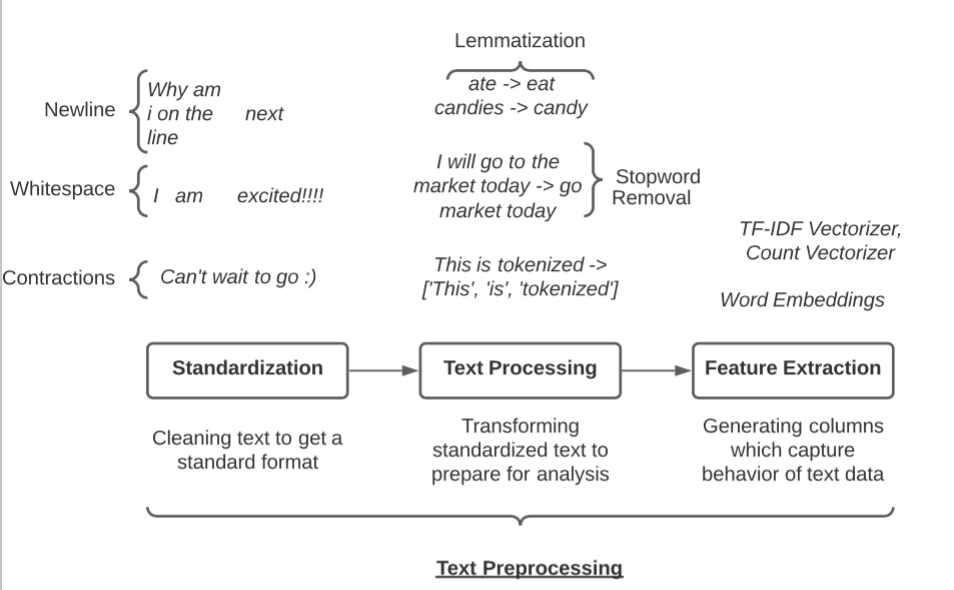


While this dataset is mostly clean, it is not always the case. In case of scraped data, tweets, product reviews, there are a bunch of issues:

1. A lot of white space

> This    is   an example   of        whitespace


2. Extra or unnecessary punctuations 

>  I'm so excited!!!!!!!

3. Weird Formatting, Different Formatting - unicode, ASCII

>  '''
... (How does it deal with this parenthesis?)  "It should be part of the
... previous sentence." "(And the same with this one.)" ('And this one!')
... "('(And (this)) '?)" [(and this. )]
... '''

Remember, words need to be converted to numbers for machine to understand. More than hundreds or thousands of unique word in the corpus results in a huge dictionary. Depending on the kind of text-to-number encoding, this can result in a sizable text representation. 

> More data needs more computing power!!

### Standardization

The aim of standardization is to have a uniform text representation. This means you want to get rid of anything that introduces inconsistencies, a few of them have been identified above. 

In [ ]:
quotes_df.loc[0, 'quotes']

From the above example we notice an extra whitespace at the beginning of the quote. However, overall the quote text is pretty clean, well formatted. However, a few things that can help make this text even more standardized is:

1. No extra whitespace
2. Uniform encoding
3. No contractions



In [24]:
def clean(text):
  #convert from unicode
  text = unidecode(text)

  #remove contractions
  text = text.replace("n't", "not")
  text = text.replace("'re", " are")
  text = text.replace("'s", " is")
  text = text.replace("'d", " would")
  text = text.replace("'ll", " will")
  text = text.replace("'ve", " have")
  text = text.replace("'m", " am")

  #remove whitespace
  text = " ".join(text.split())
  
  return text

In [ ]:
clean('this   is a sample    white    space example')

In [26]:
quotes_df['clean_quotes'] = quotes_df['quotes'].apply(clean)

In [ ]:
quotes_df.loc[0, 'clean_quotes']

### Text Processing

This is a highly analysis-specific step. Depending on the nature of the analysis you wish to carry out, the components of this step change by a lot. 

A few common components of this step are:

1. Stopword Removal
2. Punctuation Removal
3. Lowercasing
4. Lemmatization
5. Tokenization


#### Stopword Removal - Not suggested for sentiment analysis!

Stopwords are commmon words which don't add much value to the sentence such as a, an, the, etc which are removed from the text. However, like any other preprocessing task, this should be done depending on the nature of the task. Below example shows as to why we shouldn't use stopword removal for text preprocessing for sentiment analysis.

https://www.nltk.org

In [ ]:
#view current stopwords
stop_words = set(stopwords.words('english'))
sorted(stop_words)

In [ ]:
# remove stopwords from positive sentiment text
text = "This is so crazy."

# first tokenize text into words
tokens = word_tokenize(text.lower())
print(tokens)
tokens_nostop = [w for w in tokens if w not in stop_words]
print('\n', tokens_nostop)

In [ ]:
# remove stopwords from negative sentiment text
text = "This is not crazy."

# first tokenize text into words
tokens = word_tokenize(text.lower())
print(tokens)
tokens_nostop = [w for w in tokens if w not in stop_words]
print('\n', tokens_nostop)

#### Lowercasing, Tokenization, Lemmatization

In [21]:
wnl = WordNetLemmatizer()

def penn2morphy(penntag):
  #Converts Penn Treebank tags to WordNet.
  morphy_tag = {'NN':'n', 'JJ':'a',
                'VB':'v', 'RB':'r'}
  try:
    return morphy_tag[penntag[:2]]
  except:
    return 'n' 

def lemmatize_sent(text): 
  # Text input is string, returns lemmatized strings.
  return [wnl.lemmatize(word, pos=penn2morphy(tag)) 
          for word, tag in pos_tag(word_tokenize(text))]

def preprocess(text):

  #lower casing
  text = text.lower()

  #lemmatization
  text = " ".join(lemmatize_sent(text))
  
  return " ".join(text.split())

In [30]:
quotes_df['processed_quotes'] = quotes_df['clean_quotes'].apply(preprocess)

In [ ]:
quotes_df.loc[0, 'processed_quotes']

## Sentiment Analysis

In this section, we will use the Quotes dataset to perform sentiment analysis using:

1. **Libraries** - TextBlob, VADER
2. **Machine Learning (ML) algorithm** - Logistic Regression

### Sentiment Analysis using Libraries






---
#### VADER

---

https://pypi.org/project/vaderSentiment/

VADER Sentiment Analysis. VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.

In [10]:
#sentiment analysis using VADER
analyzer = SentimentIntensityAnalyzer()
print(analyzer.polarity_scores("Today only kinda sux! Goota go off"))
print(analyzer.polarity_scores("Taylor swift is a kween, slayy can't wait for all her versions"))
print(analyzer.polarity_scores("Taylor swift is THE pop kween 💘, slayy can't wait for all her versions 😁"))

{'neg': 0.294, 'neu': 0.706, 'pos': 0.0, 'compound': -0.3609}
{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.2023}
{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.8402}


In [116]:
def get_sentiment(text, analyzer):
  score = analyzer.polarity_scores(text)
  compound = score['compound']
  if compound >= 0.05:
    return 'Positive' 
  elif compound <= -0.05:
    return 'Negative' 
  else:
    return 'Neutral'

In [117]:
quotes_df['vader_sentiment'] = quotes_df['clean_quotes'].apply(lambda x: get_sentiment(x, analyzer))

In [118]:
quotes_df.head()

,speaker,quotes,sentiment_label,clean_quotes,processed_quotes,vader_sentiment
0,Pete Buttigieg,This is the exact same conversation we’ve bee...,Positive,This is the exact same conversation we have be...,"[this, be, the, exact, same, conversation, we,...",Positive
1,Kamala Harris,Absolutely not. But my plan has been describe...,Positive,Absolutely not. But my plan has been described...,"[absolutely, not, ., but, my, plan, have, be, ...",Positive
2,Bernie Sanders,"Let’s be clear, what this debate is about. No...",Negative,"Let is be clear, what this debate is about. No...","[let, be, be, clear, ,, what, this, debate, be...",Positive
3,Elizabeth Warren,But you did it using workers all of us helped...,Positive,But you did it using workers all of us helped ...,"[but, you, do, it, use, worker, all, of, u, he...",Positive
4,Joe Biden,So my point is… And one of the reasons I was ...,Negative,So my point is... And one of the reasons I was...,"[so, my, point, be, ..., and, one, of, the, re...",Neutral


### Sentiment Analysis using Logistic Regression

Machine learning algorithms are of three kinds:

1. Supervised Learning 
2. Unsupervised Learning 

This is a supervised learning approach because we have ground truth labels. The algorithm tries to understand the behavior of the data pertaining to a particular class to help predict which class a new data point will belong to. 
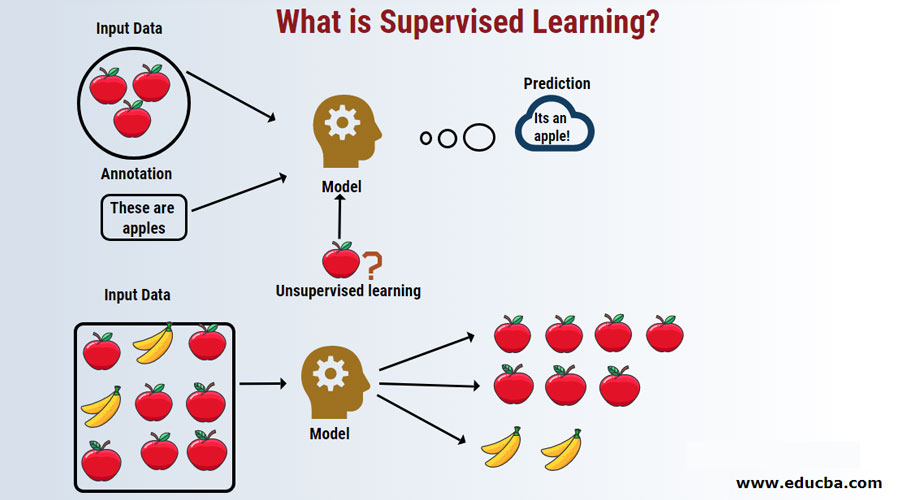

In [33]:
corpus = quotes_df['processed_quotes']
y = quotes_df['sentiment_label']

#### Feature Extraction

TF-IDF Vectorizer

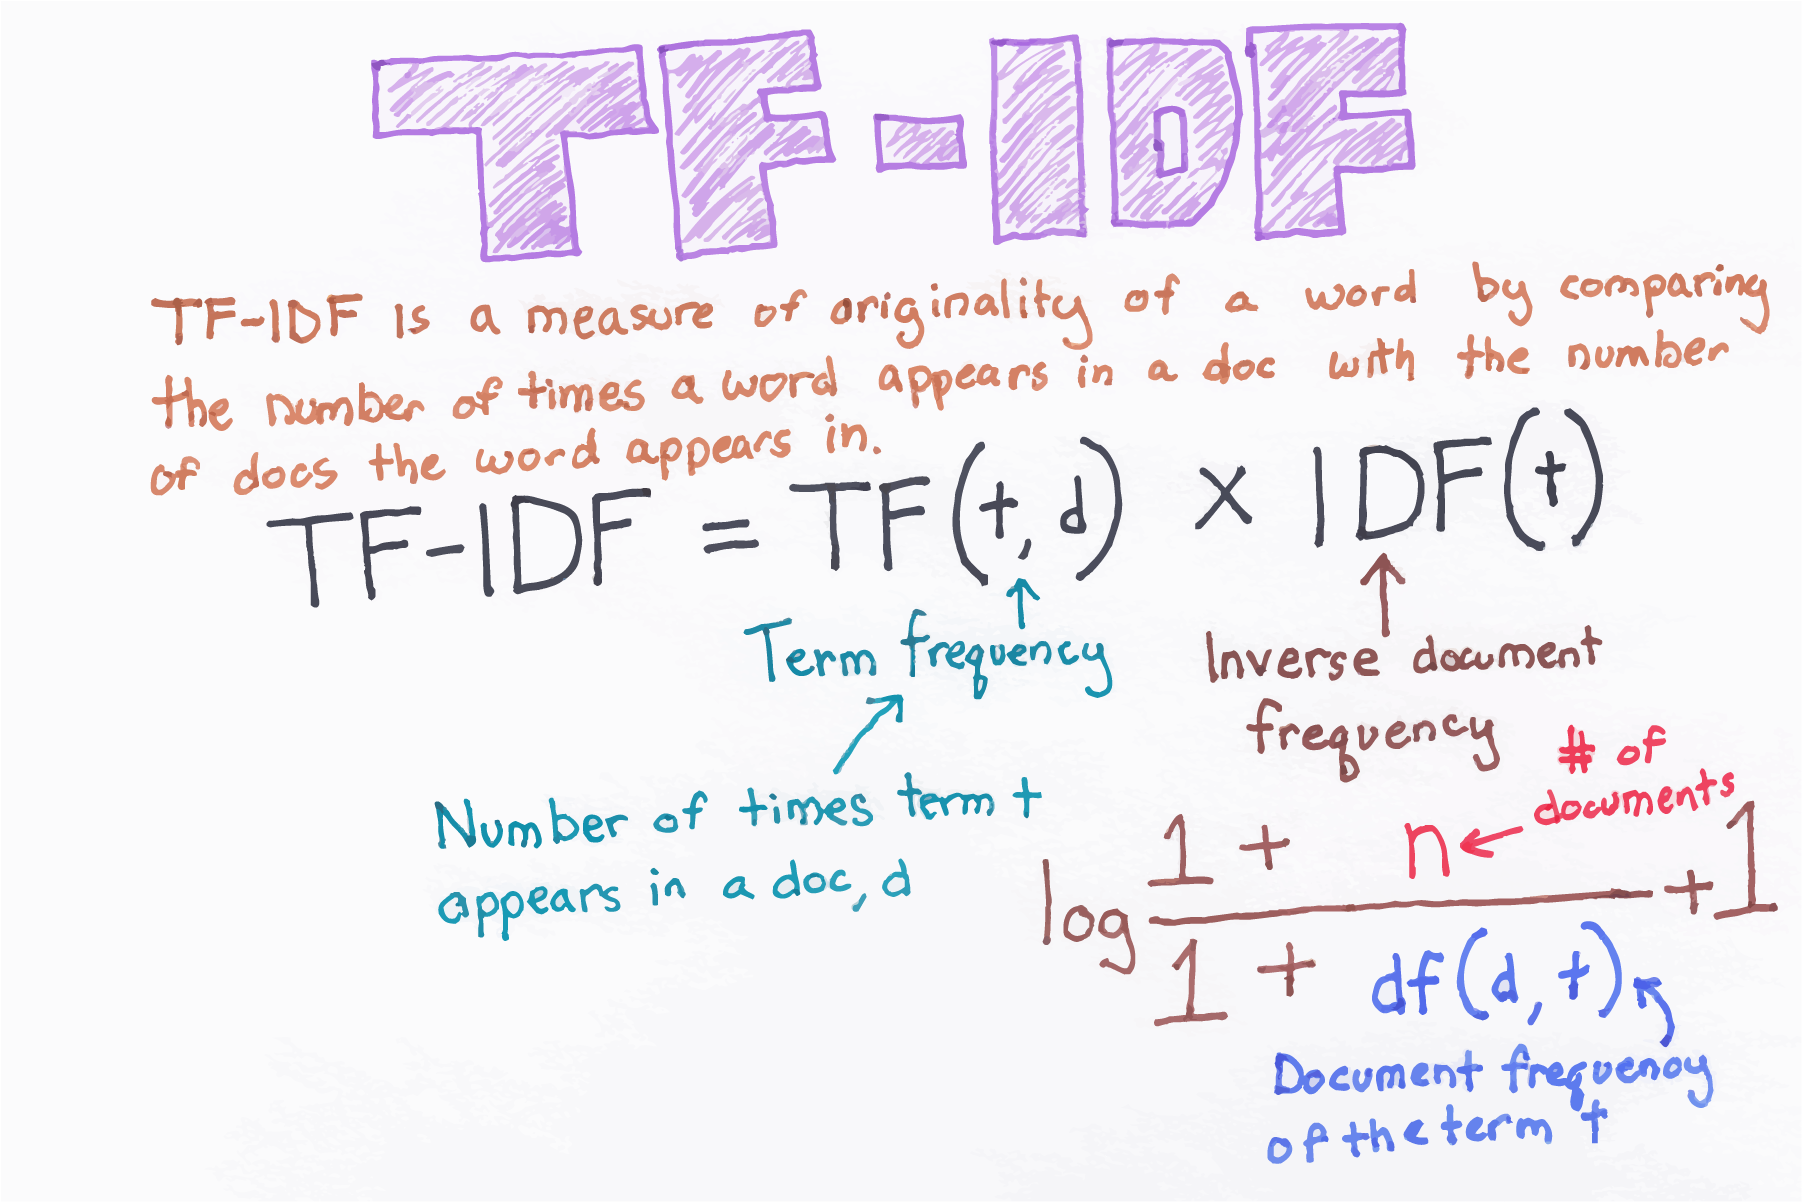

In [ ]:
# set of documents
train = ['The sky is blue.','The sun is bright.']
test = ['The sun in the sky is bright', 'We can see the shining sun, the bright sun.']
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

# convert the documents into a matrix
tfidf_wm = tfidfvectorizer.fit_transform(train)

#retrieve the terms found in the corpora
tfidf_tokens = tfidfvectorizer.get_feature_names()
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index = ['Doc1','Doc2'],columns = tfidf_tokens)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)

#### Training logistic regression model

It finds the probability of a data point belonging to a class 


In [35]:
corpus_train, corpus_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=7)

vectorizer = TfidfVectorizer(min_df=10)
X_train = vectorizer.fit_transform(corpus_train)
X_test = vectorizer.transform(corpus_test)

In [ ]:
clf_rl = LogisticRegression(verbose=1, solver='liblinear',random_state=0, penalty = 'l2', C=5,max_iter=1000)
clf_rl.fit(X_train, y_train)
print("For the regularized logistic regression, the coefficents are as follows:\n")
print(clf_rl.coef_)

In [ ]:
print("The training accuracy score is", clf_rl.score(X_train, y_train)*100, "%")

In [ ]:
class_names = quotes_df['sentiment_label'].unique()

matrix = confusion_matrix(y_train, clf_rl.predict(X_train), labels =  class_names)
rl_acc = matrix.diagonal()/matrix.sum(axis=1 )
c1_df = pd.DataFrame({'accuracy': rl_acc}, index=class_names)
cm1_df = pd.DataFrame(matrix, index = class_names, columns = class_names)

print("\n\nThe accuracy for each class is\n", c1_df)
print("=========================================================\n\n\nConfusion Matrix\n\n")
cm1_df.head(12)

In [ ]:
y_pred = clf_rl.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf_rl.score(X_test, y_test)))

In [ ]:
y_pred

References

1. https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a
